# DATASET INFO - Sample dataset containing Teleco customer data and showing customers left last month 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline


In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# CHECKING VARIOUS ATTRIBUTES OF DATASET LIKE SHAPE(ROW AND COL) AND DATATYPES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# There is no null value in the dataset

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is a categorical hence the 25%-50%-75% distribution is not proper.
75%  of customer have tenure less than 55 months.
Average monthly charge is USD 64.76 and more than 25% customer pay more than USD 89.85 per month.

No     5174
Yes    1869
Name: Churn, dtype: int64


TypeError: unsupported operand type(s) for *: 'int' and 'Axes'

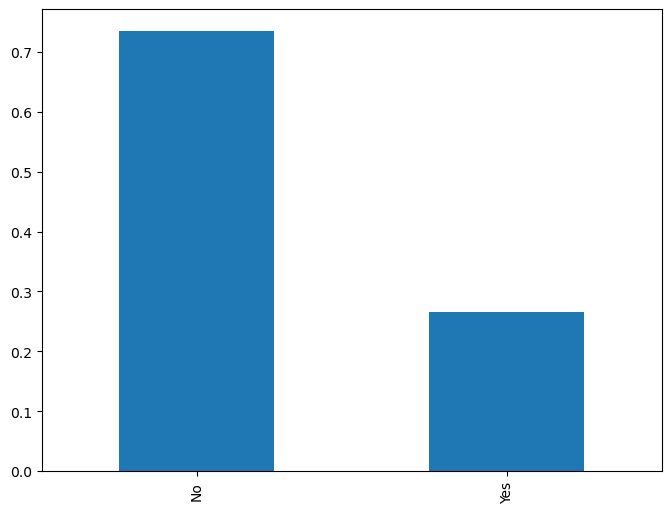

In [14]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize = True).plot(kind = 'bar',figsize = (8,6))
plt.ylabel("Count")
plt.xlabel("Target Variable")
plt.title("Count of Target Variable per Category")
plt.show()

In [21]:
df['Churn'].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Around 26.53% of the customer  churn 

The data in highly imbalanced 73:27

So we analyze the data with other features while taking the target values separately to get some insights

# DATA CLEANING

Creating the copy of the original data for data manupulation and processing


In [22]:
df_copy = df.copy()

In [24]:
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'] ,errors = 'coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can seen that there are 11 null values as these we not earlier (before conversion). Let's check these records.

In [25]:
df_copy.loc[df_copy['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the missing values is very low as compared to the whole dataset, it is safe to ignore them from further processing 

In [27]:
# Removing the missing values
df_copy.dropna(how = 'any',inplace = True)

Group the tenure into bins of 12 month

In [29]:
print(df_copy['tenure'].max())
# getting the maximum values of the tenure

72


In [31]:
labels = ["{0} - {1}".format(i,i +11) for i in range(1,72,12)]

df_copy['tenure_group'] = pd.cut(df_copy['tenure'], range(1,80,12), right = False , labels = labels)

In [32]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [33]:
df_copy.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [34]:
# droping customerID and tenure
df_copy.drop(columns =['customerID','tenure'],axis = 1, inplace = True )
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# DATA EXPLORATION 

Plot distribution of individual predictors by churn

# UNIVARIATE ANALYSIS

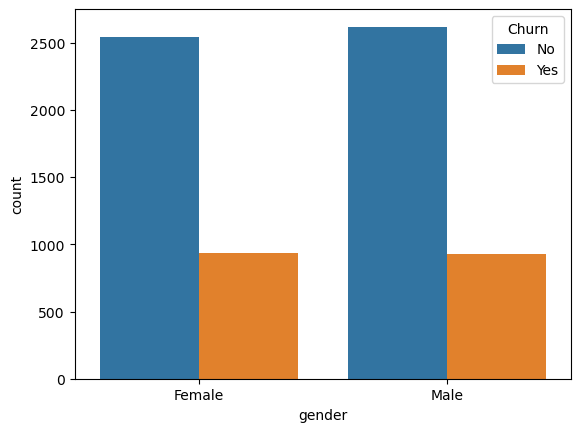

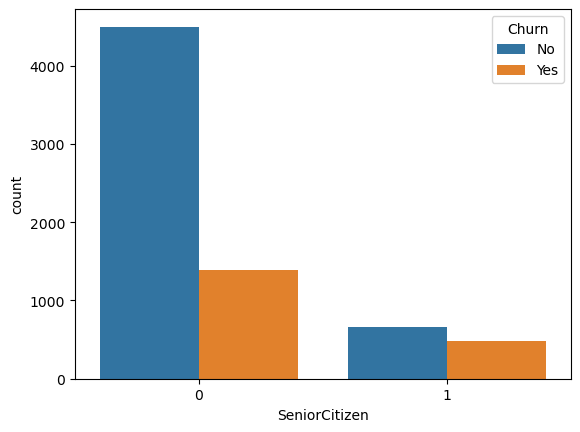

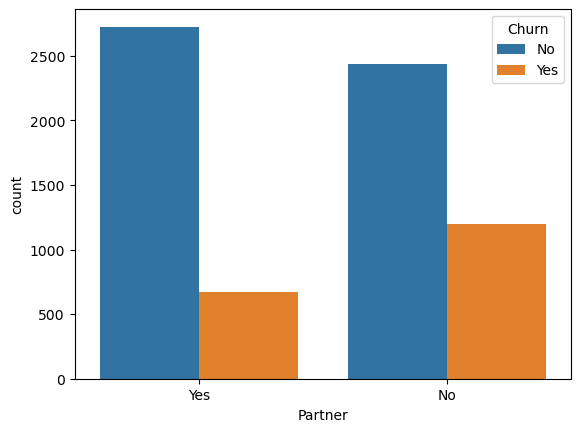

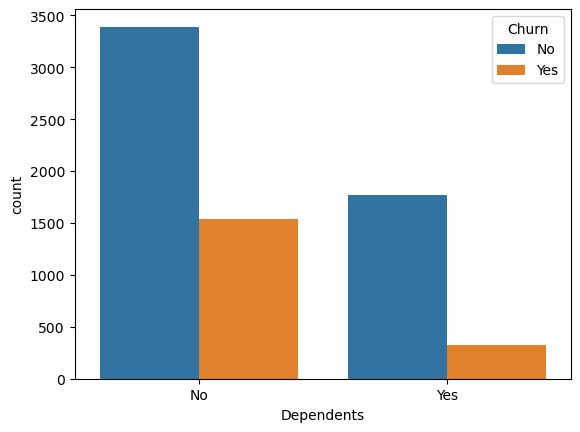

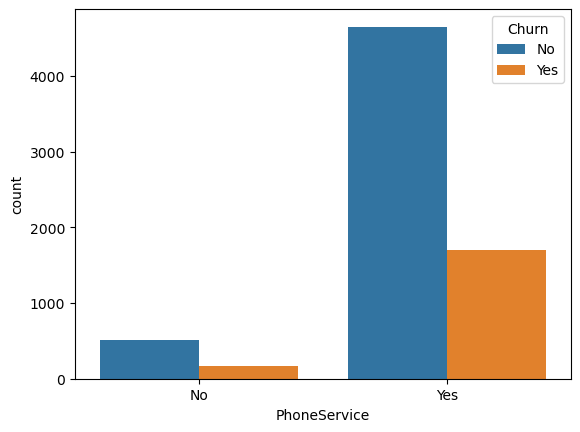

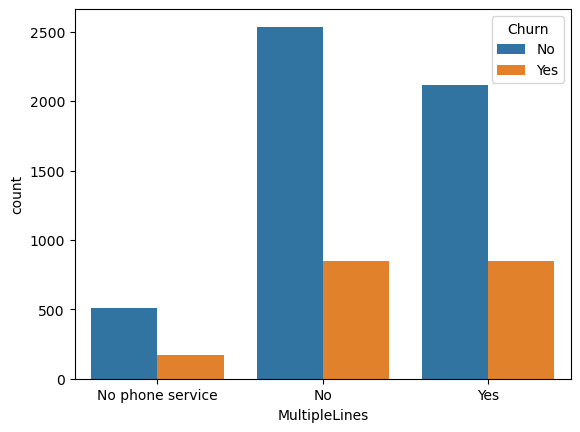

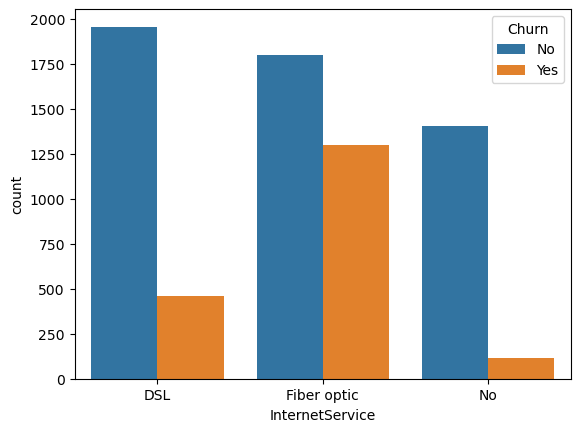

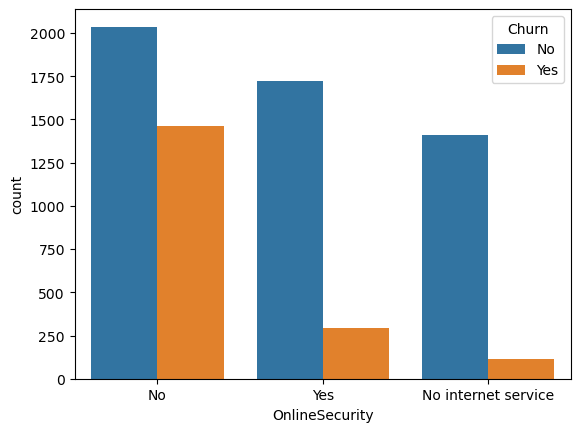

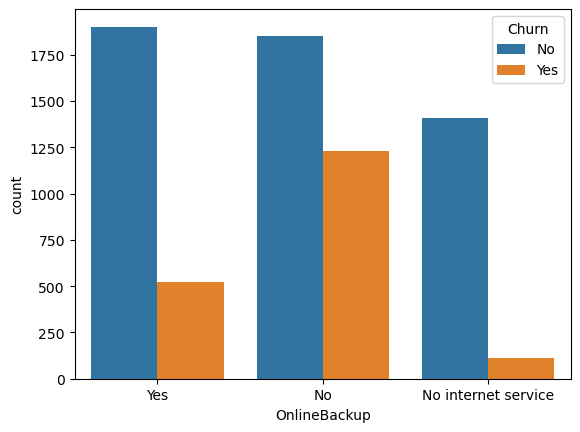

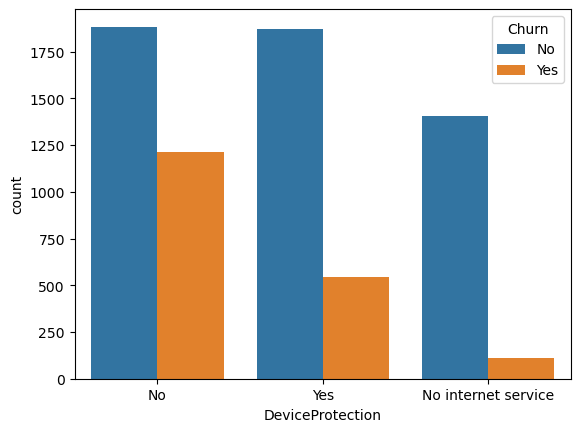

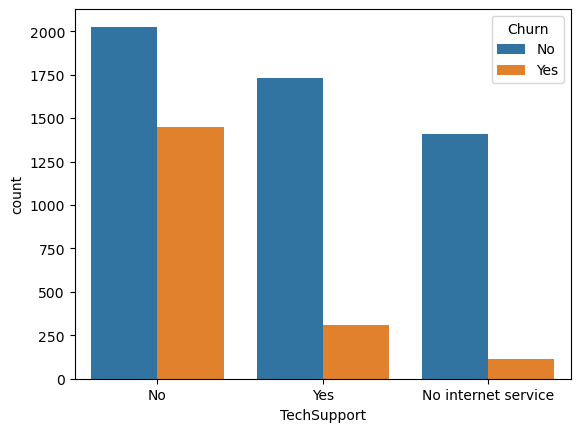

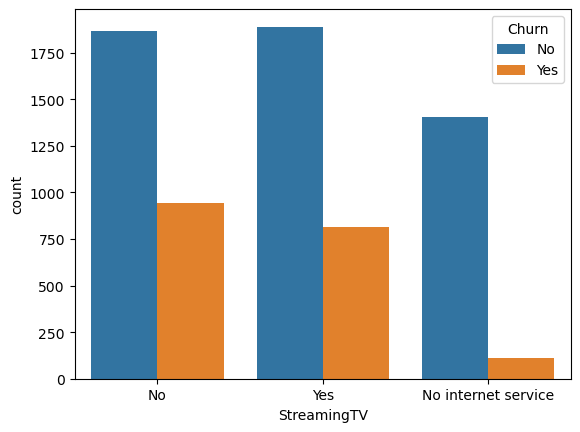

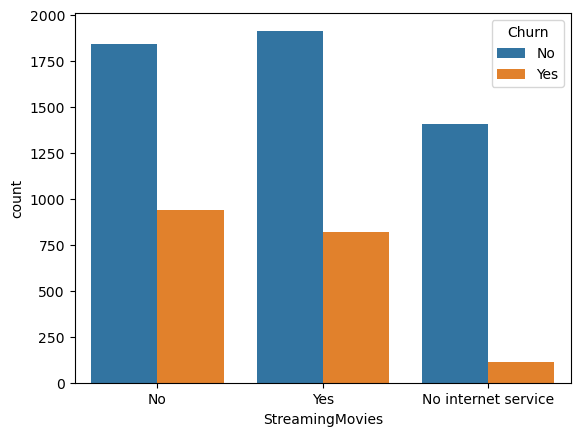

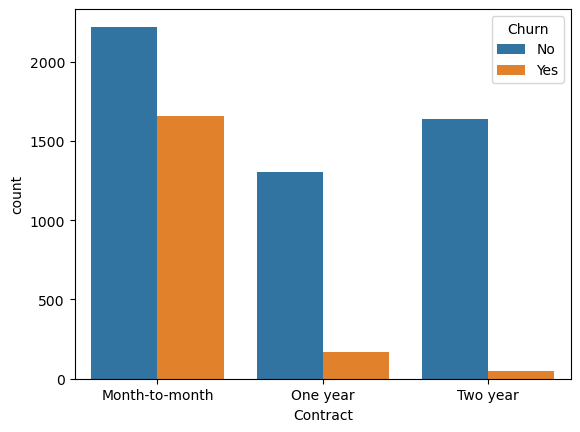

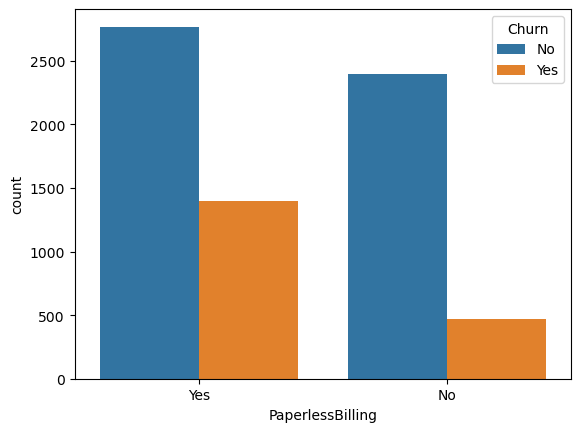

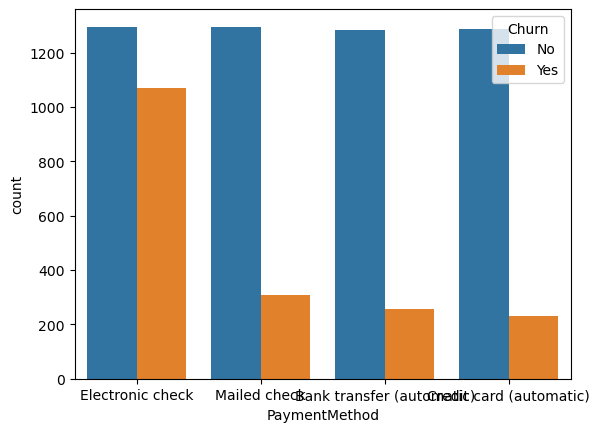

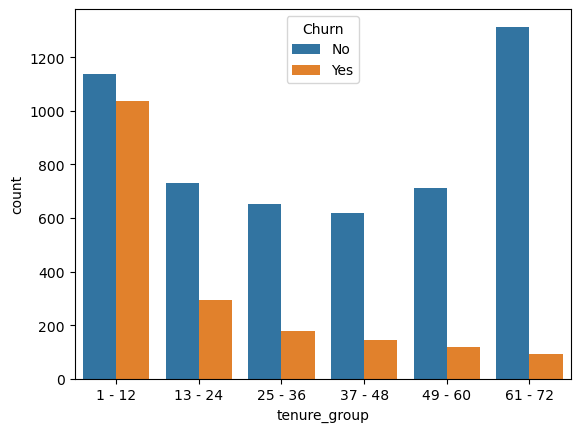

In [36]:
for i, predictor in enumerate(df_copy.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = df_copy, x = predictor,hue = 'Churn')

Convert the target variable 'Churn into binary numeric variable i.e Yes = 1 : NO = 0

In [37]:
df_copy['Churn'] = np.where(df_copy['Churn'] == 'Yes', 1,0)

In [38]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Convert all the categorical variable into dummy variable

In [39]:
df_dummies = pd.get_dummies(df_copy)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between monthly charges and total charges 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


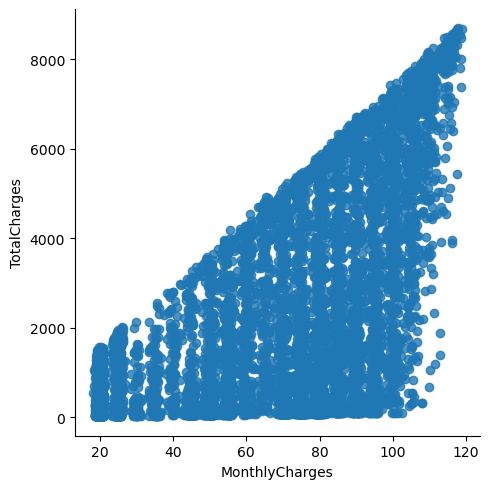

In [42]:
sns.lmplot(data = df_dummies, x='MonthlyCharges', y ='TotalCharges', fit_reg = False)
plt.show()

Total charges increases as monthly charges increases - as expected

Churn by monthly charges and total charges

C:\Users\HP\AppData\Local\Temp\ipykernel_1836\2017874685.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)],color = 'red',shade = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1836\2017874685.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)],color = 'blue',shade = True,ax = mth)


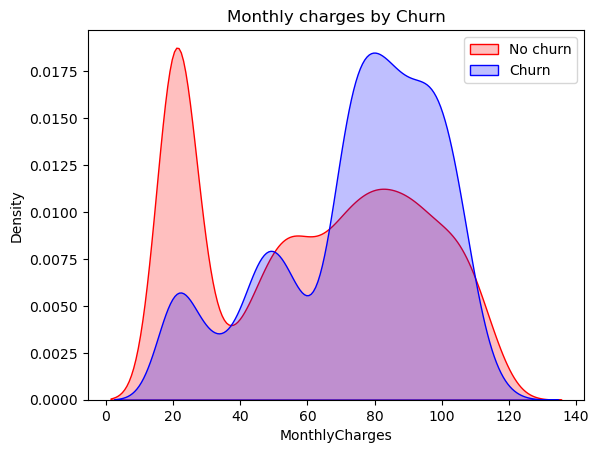

In [46]:
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==0)],color = 'red',shade = True)
mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn']==1)],color = 'blue',shade = True,ax = mth)
plt.title('Monthly charges by Churn')
plt.legend(['No churn','Churn'])
plt.show()

Churn is high when monthly charges are high 

C:\Users\HP\AppData\Local\Temp\ipykernel_1836\1852668078.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==0)],color = 'red',shade = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1836\1852668078.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==1)],color = 'blue',shade = True,ax = mth)


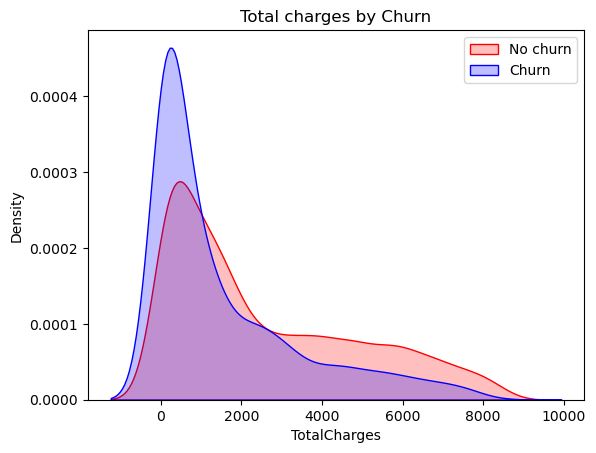

In [47]:
mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==0)],color = 'red',shade = True)
mth = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn']==1)],color = 'blue',shade = True,ax = mth)
plt.title('Total charges by Churn')
plt.legend(['No churn','Churn'])
plt.show()

<Axes: >

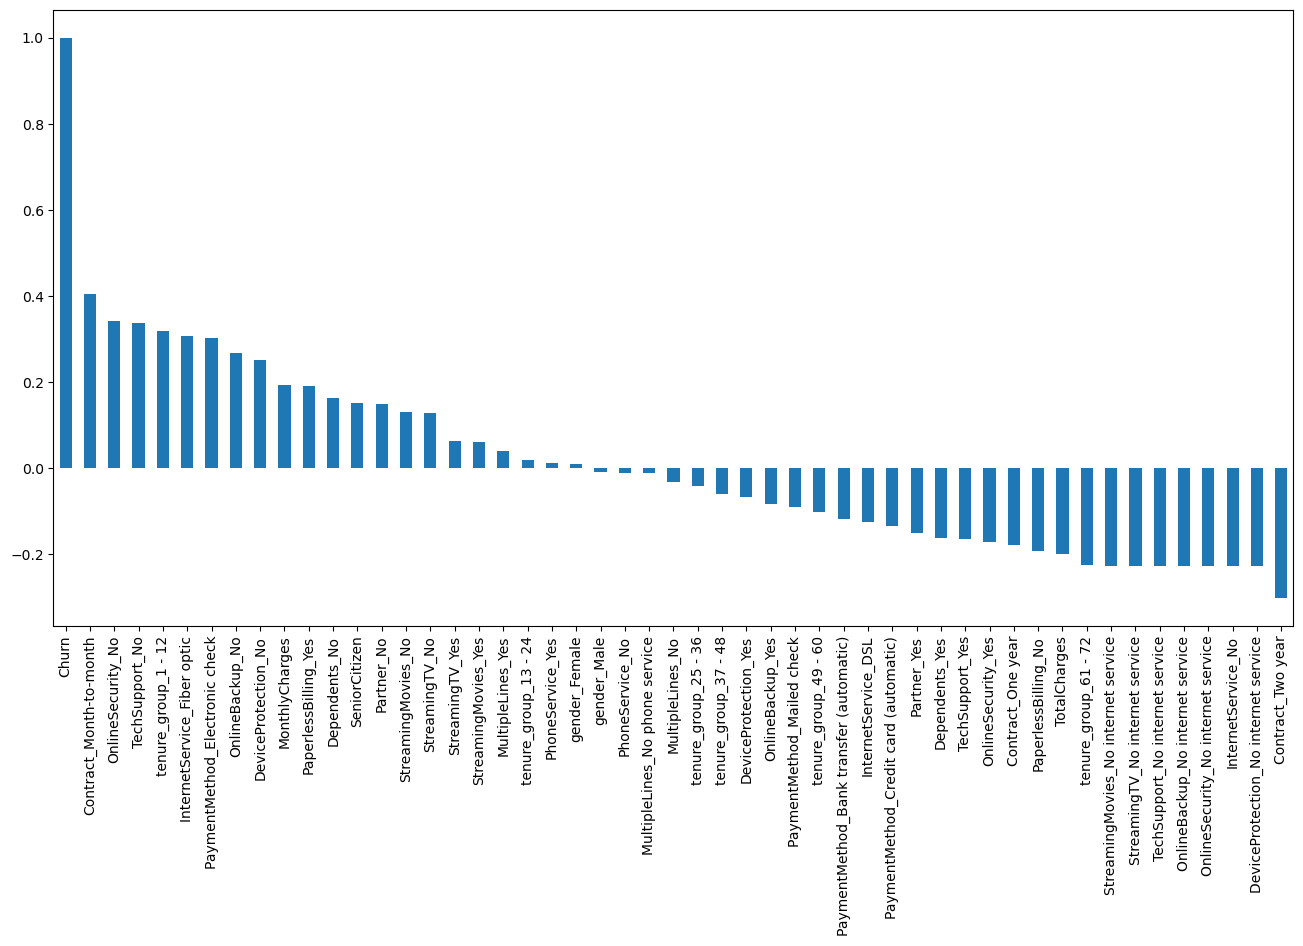

In [54]:
plt.figure(figsize = (16,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

*Derived Insights*

High churn is seen in case of Month to Month Contract, No Online Security,No Tech Support, First year of Subscription  and  Fibre Optics Internet 

Low Churn is seen in the case of Long Tern Contract, Subscriptions without Internet Service and The customer engaged for 5+ years .


Factors like Gender, Availability of Phone Service and Multiple lines have  almost no impact on Churn.

This is also evident from the heatmap below

<Figure size 1200x1200 with 0 Axes>

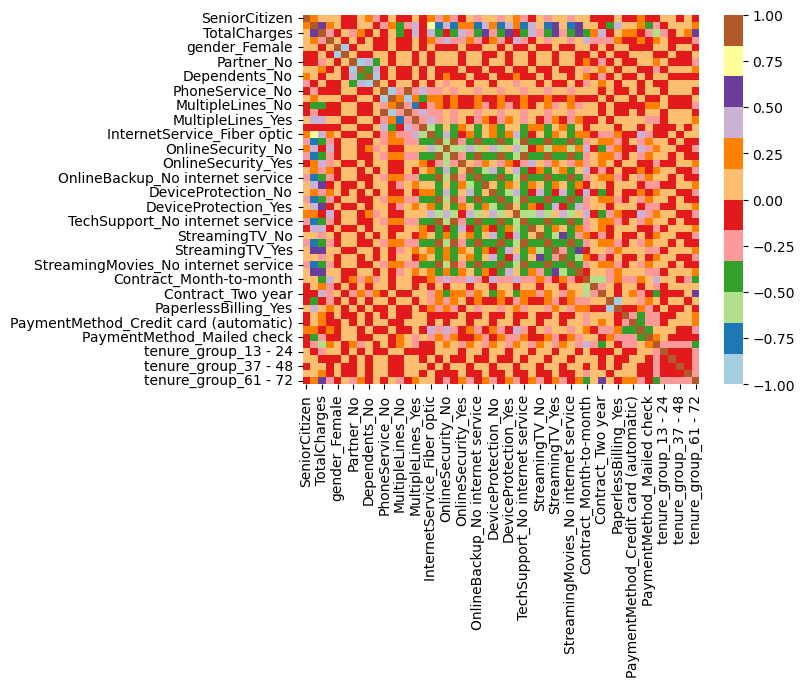

<Figure size 1200x1200 with 0 Axes>

In [58]:
sns.heatmap(df_dummies.corr(),cmap = 'Paired')
plt.figure(figsize = (12,12))

# BIVARIATE ANALYSIS

In [59]:
new_df_target_0 = df_copy.loc[df_copy.Churn == 0]
new_df_target_1 = df_copy.loc[df_copy.Churn == 1]


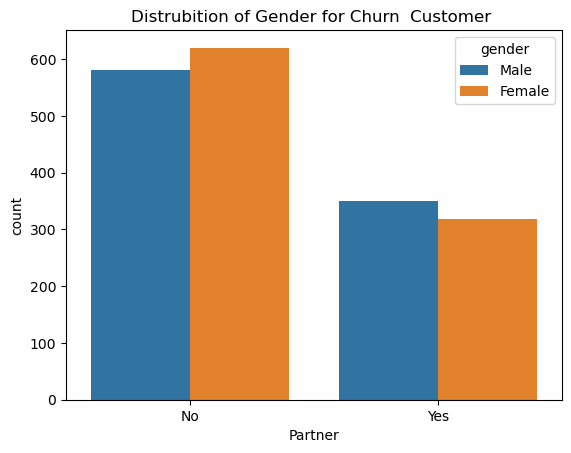

In [63]:
sns.countplot(new_df_target_1,x ='Partner', hue = 'gender')
plt.title('Distrubition of Gender for Churn  Customer ')
plt.show()

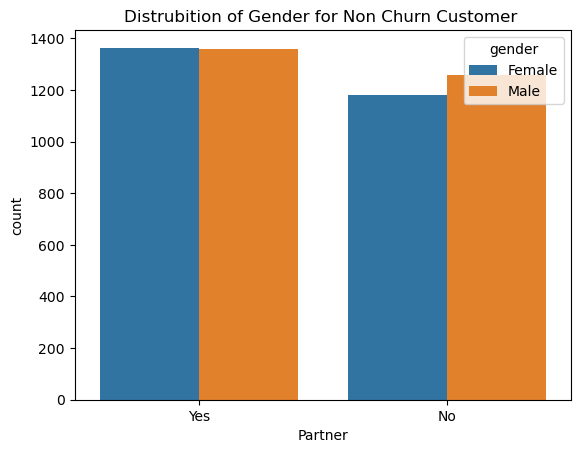

In [64]:
sns.countplot(new_df_target_0,x ='Partner', hue = 'gender')
plt.title('Distrubition of Gender for Non Churn Customer ')
plt.show()

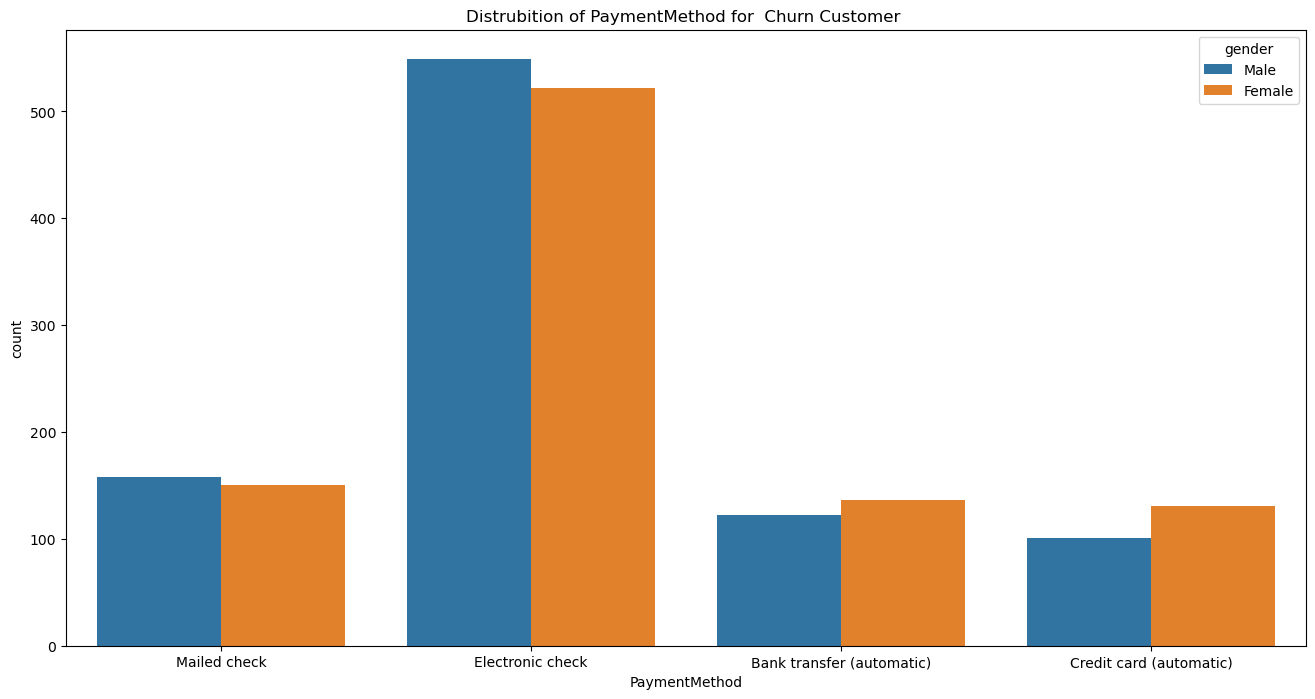

In [67]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='PaymentMethod', hue = 'gender')
plt.title('Distrubition of PaymentMethod for  Churn Customer ')
plt.show()

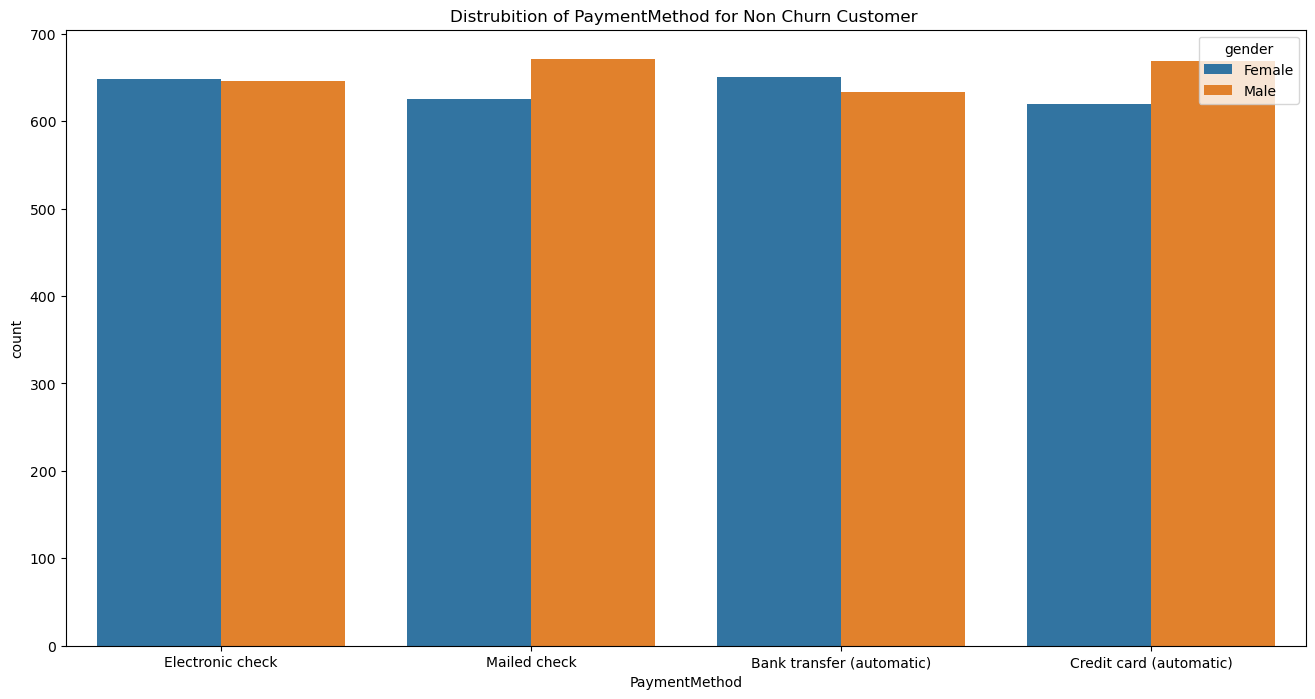

In [68]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='PaymentMethod', hue = 'gender')
plt.title('Distrubition of PaymentMethod for Non Churn Customer ')
plt.show()

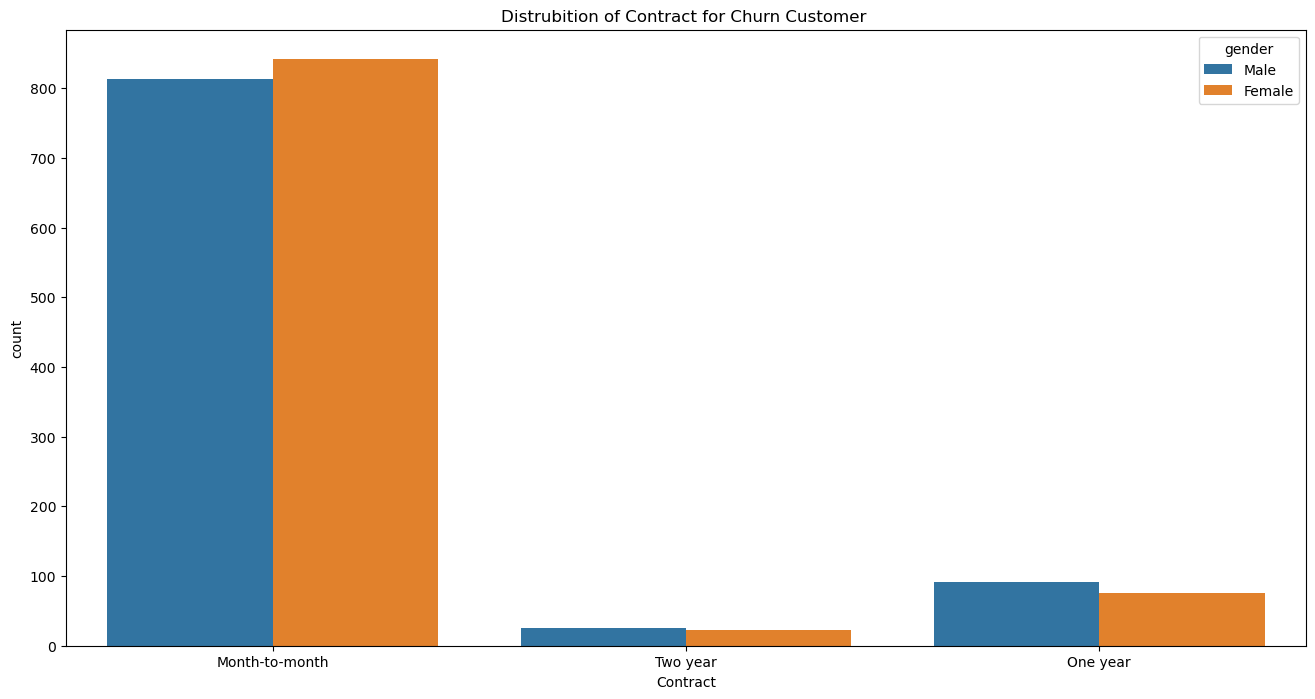

In [70]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='Contract', hue = 'gender')
plt.title('Distrubition of Contract for Churn Customer ')
plt.show()

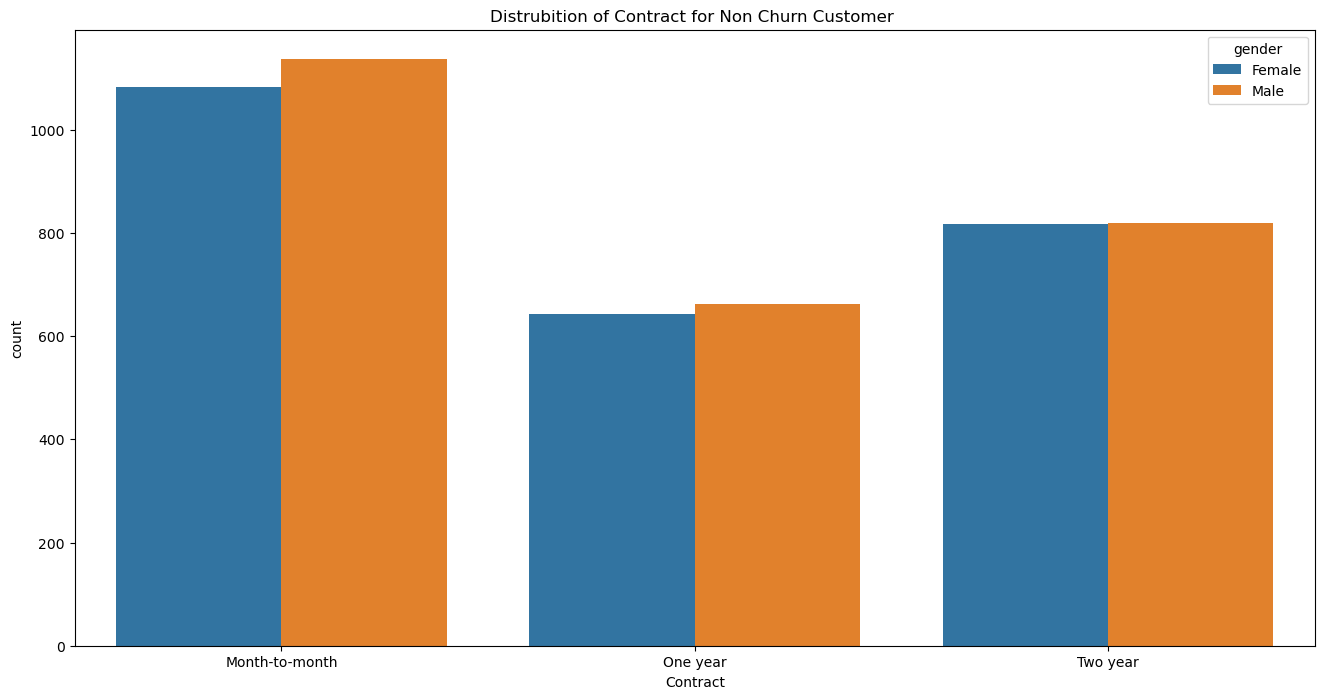

In [71]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='Contract', hue = 'gender')
plt.title('Distrubition of Contract for Non Churn Customer ')
plt.show()

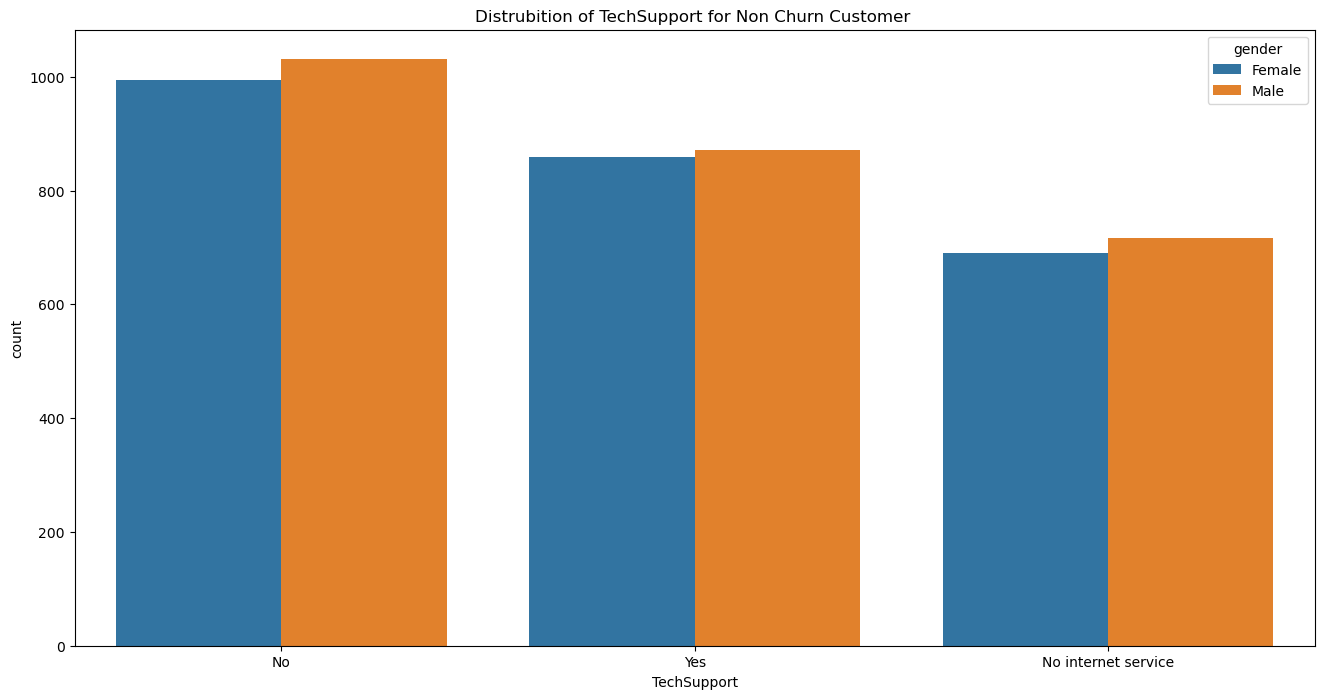

In [72]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='TechSupport', hue = 'gender')
plt.title('Distrubition of TechSupport for Non Churn Customer ')
plt.show()

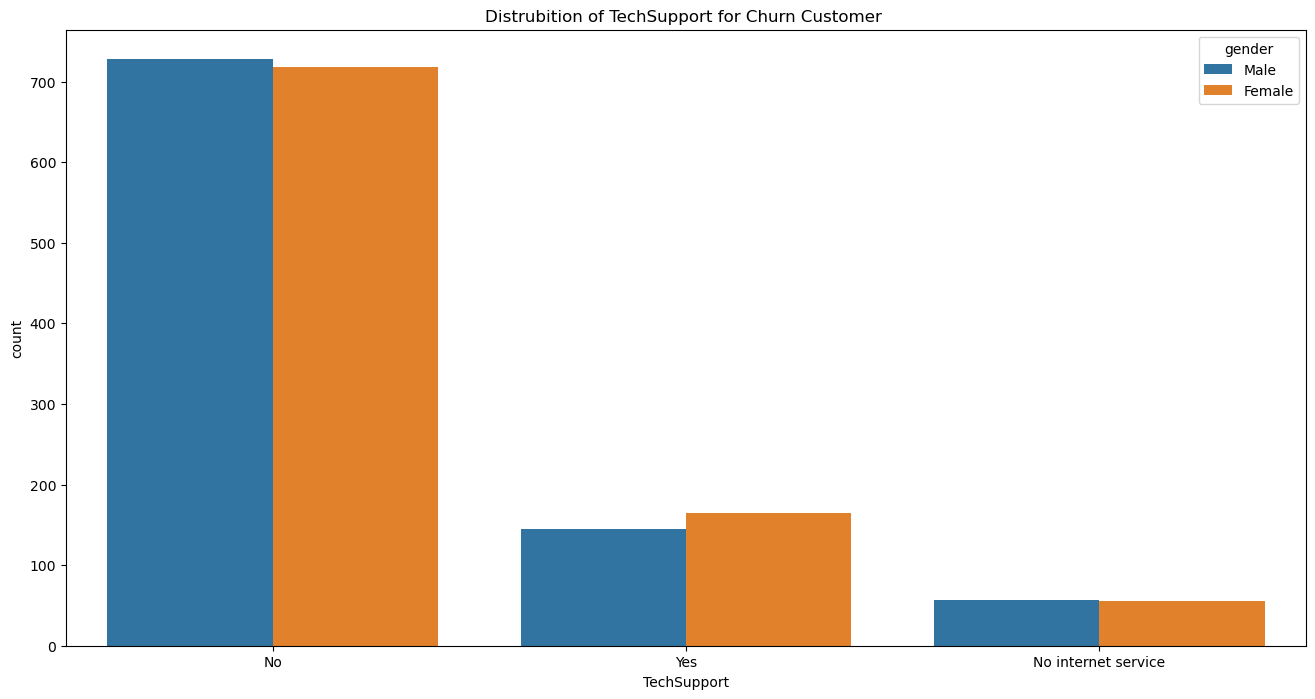

In [73]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='TechSupport', hue = 'gender')
plt.title('Distrubition of TechSupport for Churn Customer ')
plt.show()

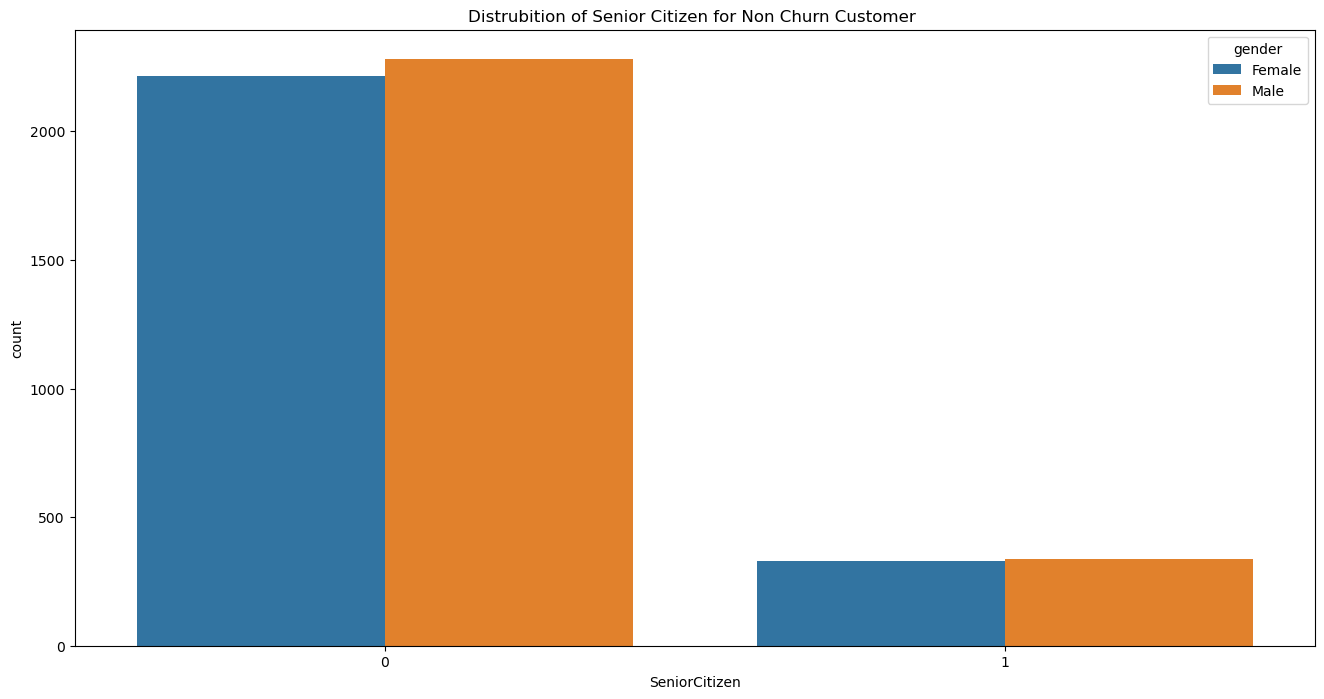

In [74]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='SeniorCitizen', hue = 'gender')
plt.title('Distrubition of Senior Citizen for Non Churn Customer ')
plt.show()

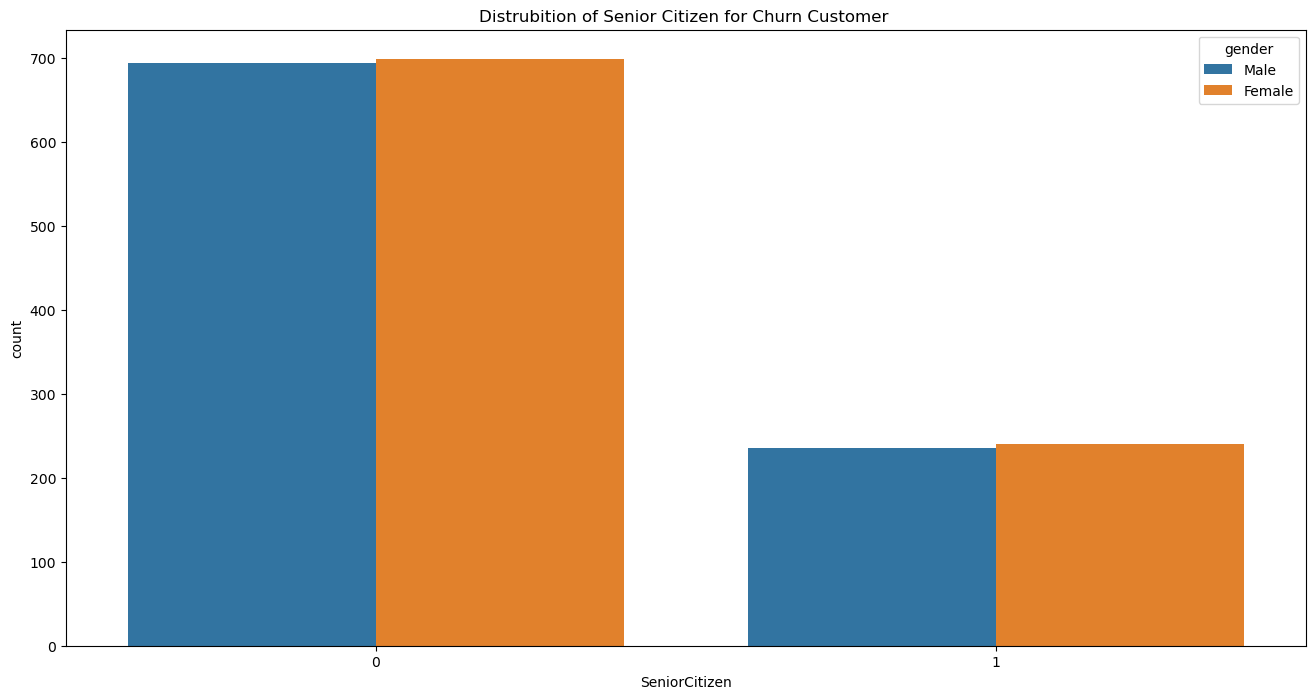

In [76]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='SeniorCitizen', hue = 'gender')
plt.title('Distrubition of Senior Citizen for Churn Customer ')
plt.show()

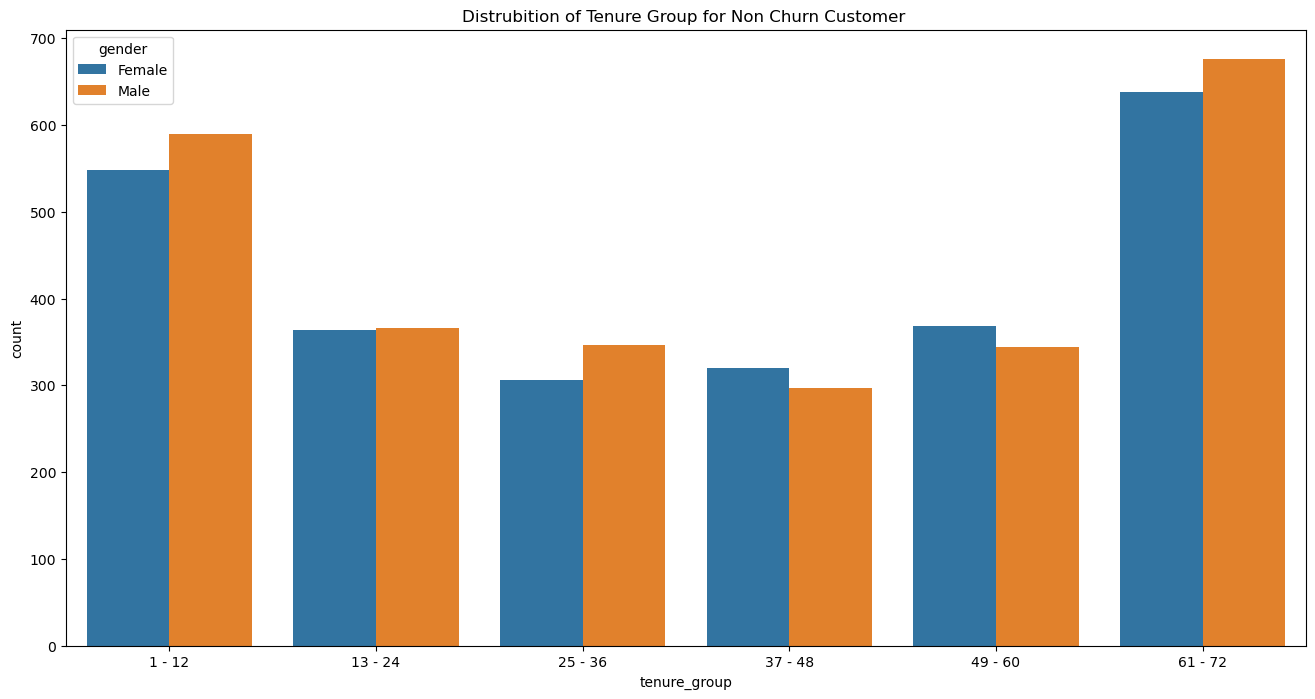

In [77]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='tenure_group', hue = 'gender')
plt.title('Distrubition of Tenure Group for Non Churn Customer ')
plt.show()

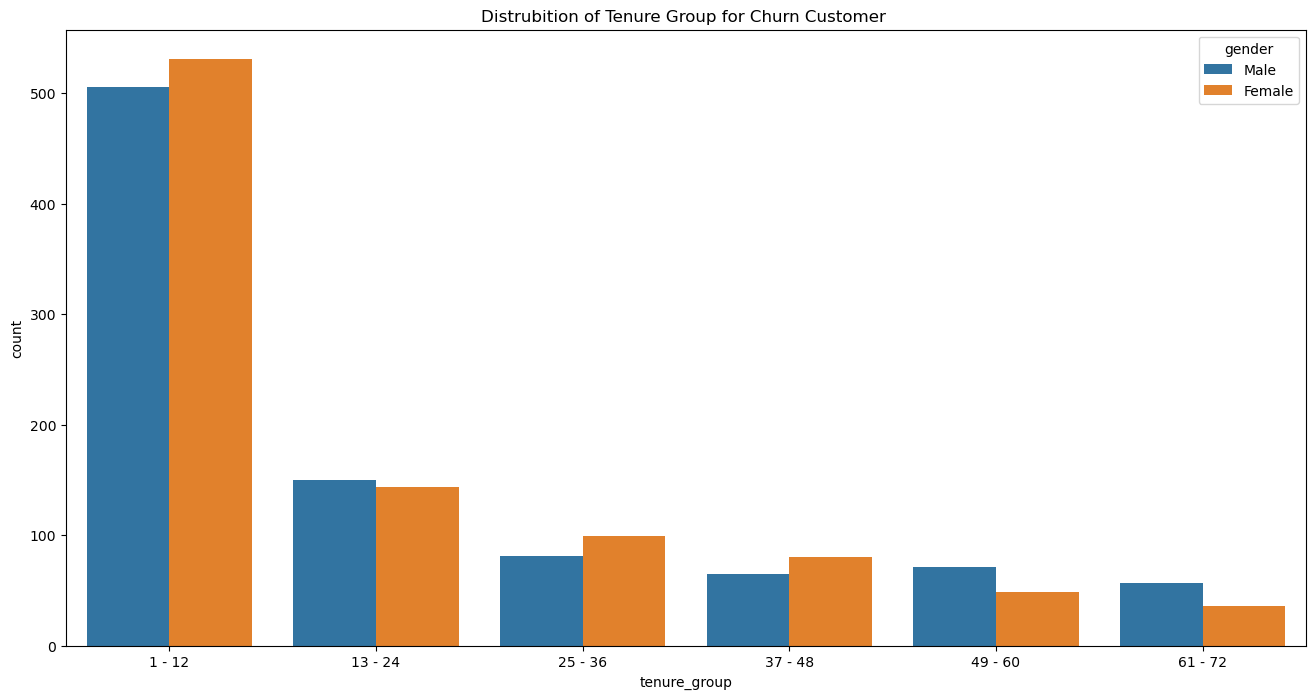

In [78]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='tenure_group', hue = 'gender')
plt.title('Distrubition of Tenure Group for Churn Customer ')
plt.show()

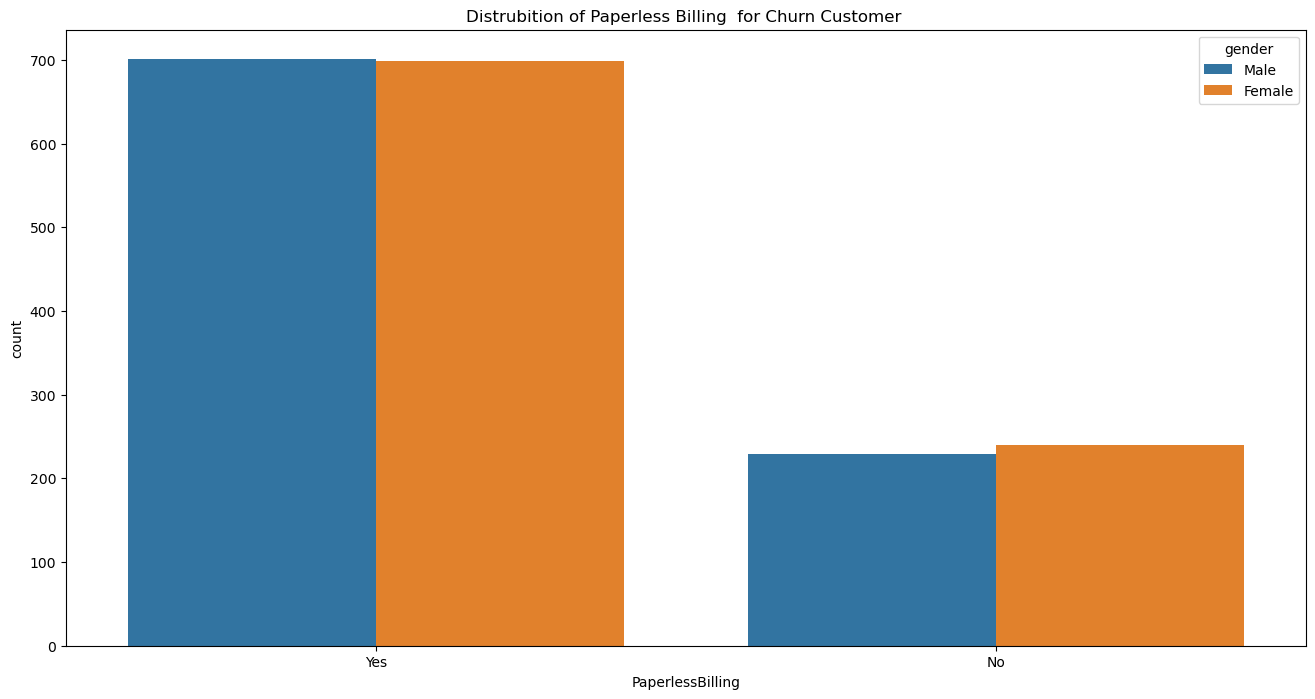

In [80]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='PaperlessBilling', hue = 'gender')
plt.title('Distrubition of Paperless Billing  for Churn Customer ')
plt.show()

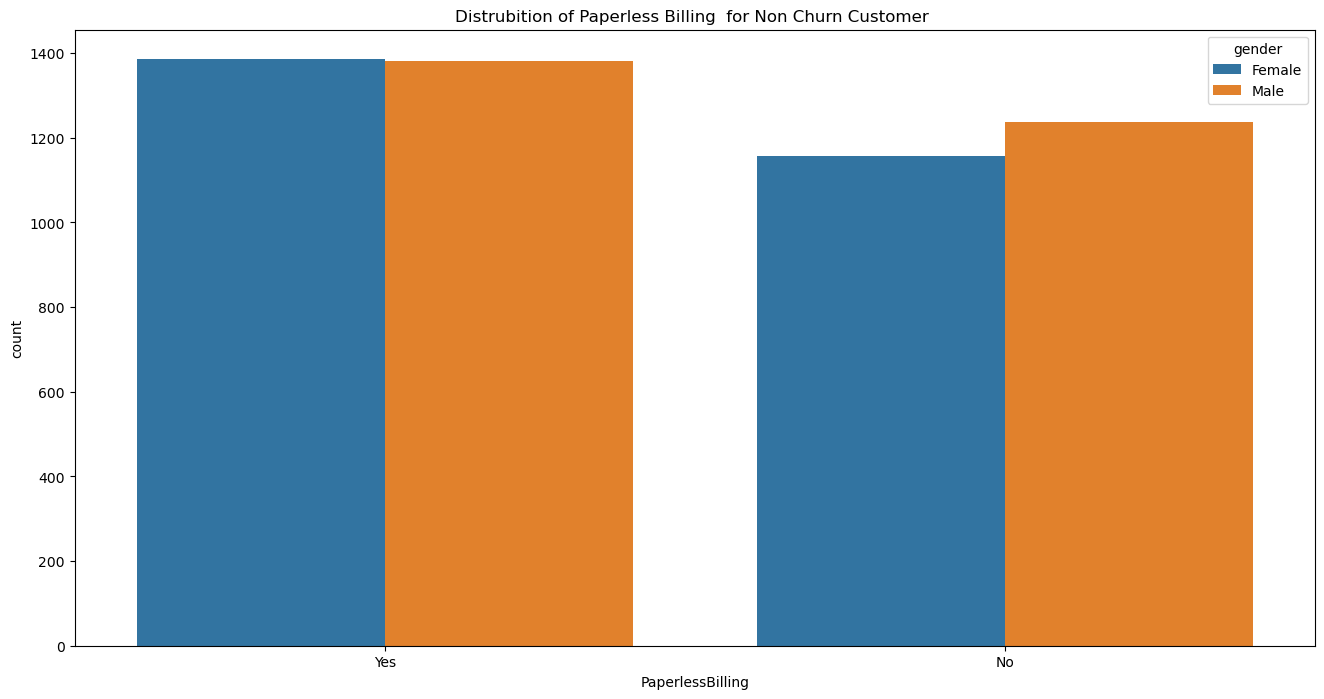

In [81]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='PaperlessBilling', hue = 'gender')
plt.title('Distrubition of Paperless Billing  for Non Churn Customer ')
plt.show()

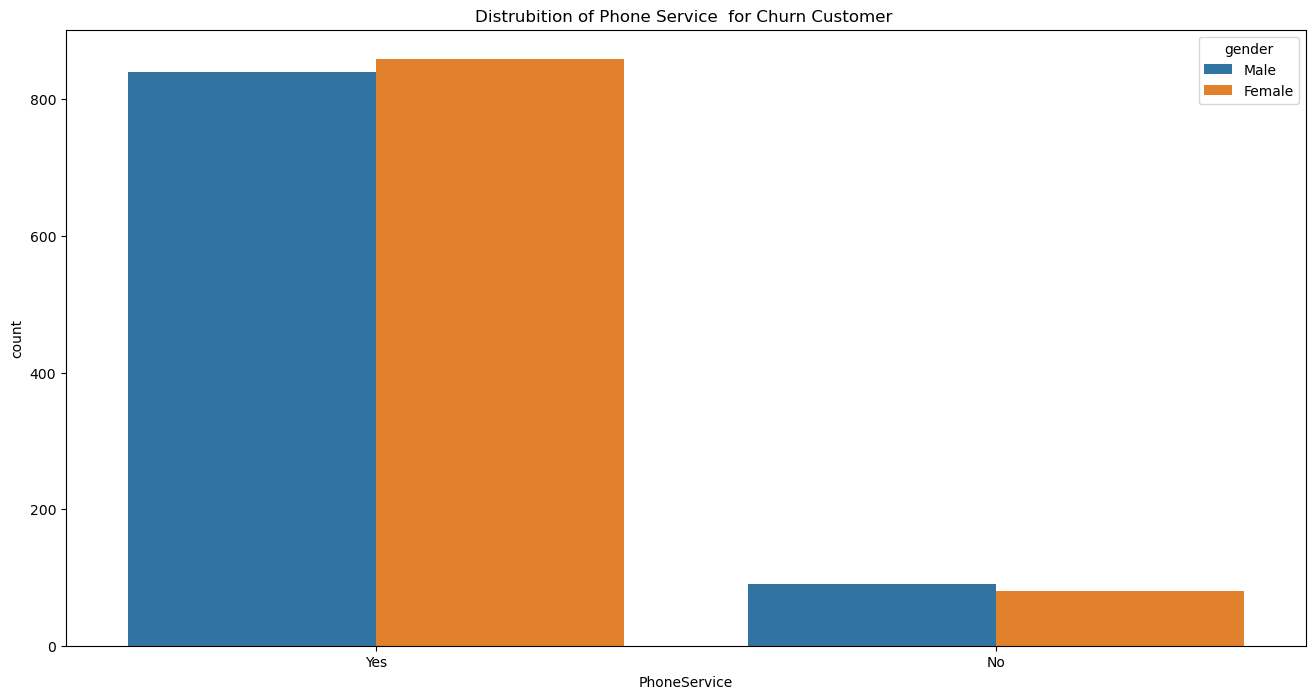

In [82]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='PhoneService', hue = 'gender')
plt.title('Distrubition of Phone Service  for Churn Customer ')
plt.show()

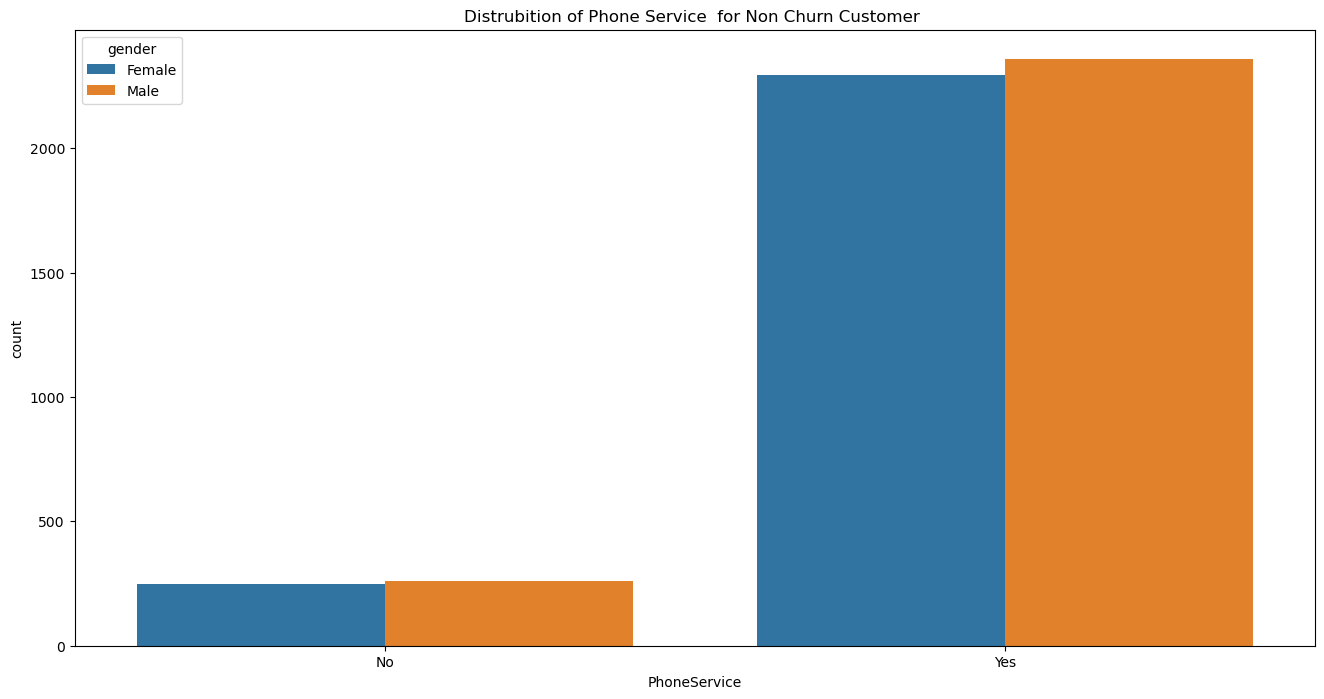

In [83]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='PhoneService', hue = 'gender')
plt.title('Distrubition of Phone Service  for Non Churn Customer ')
plt.show()

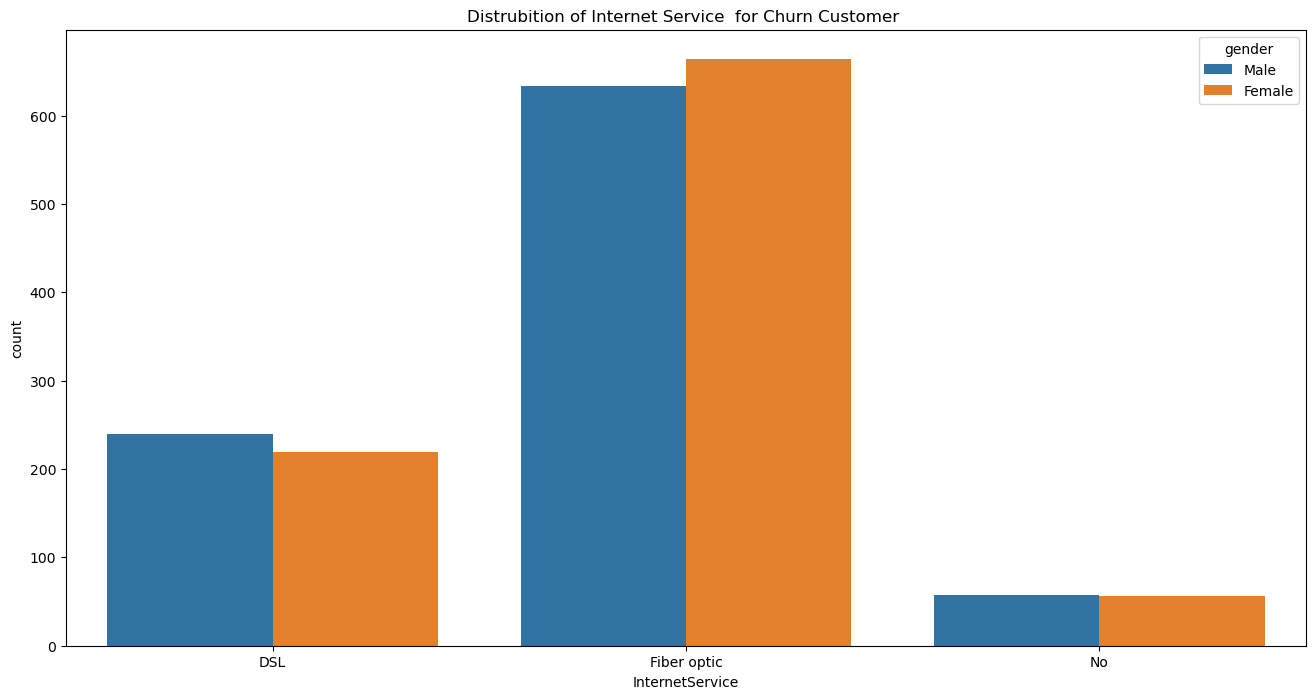

In [96]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='InternetService', hue = 'gender')
plt.title('Distrubition of Internet Service  for Churn Customer ')
plt.show()

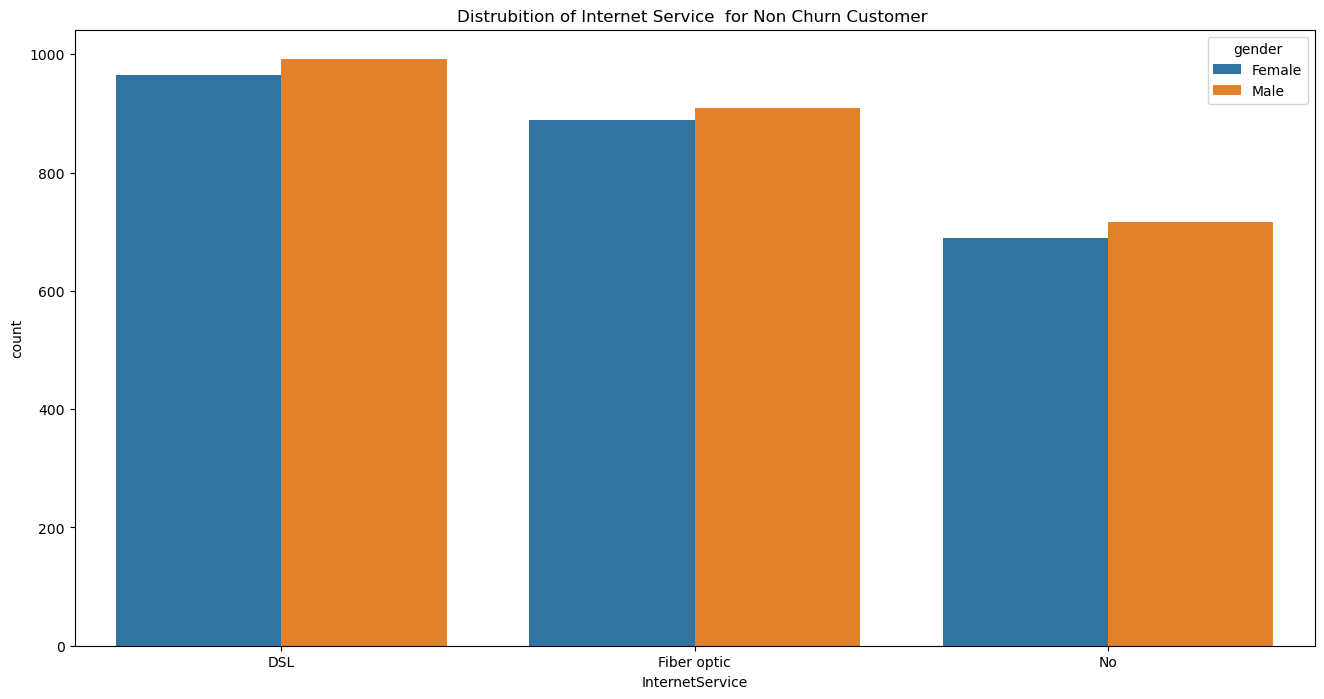

In [97]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='InternetService', hue = 'gender')
plt.title('Distrubition of Internet Service  for Non Churn Customer ')
plt.show()

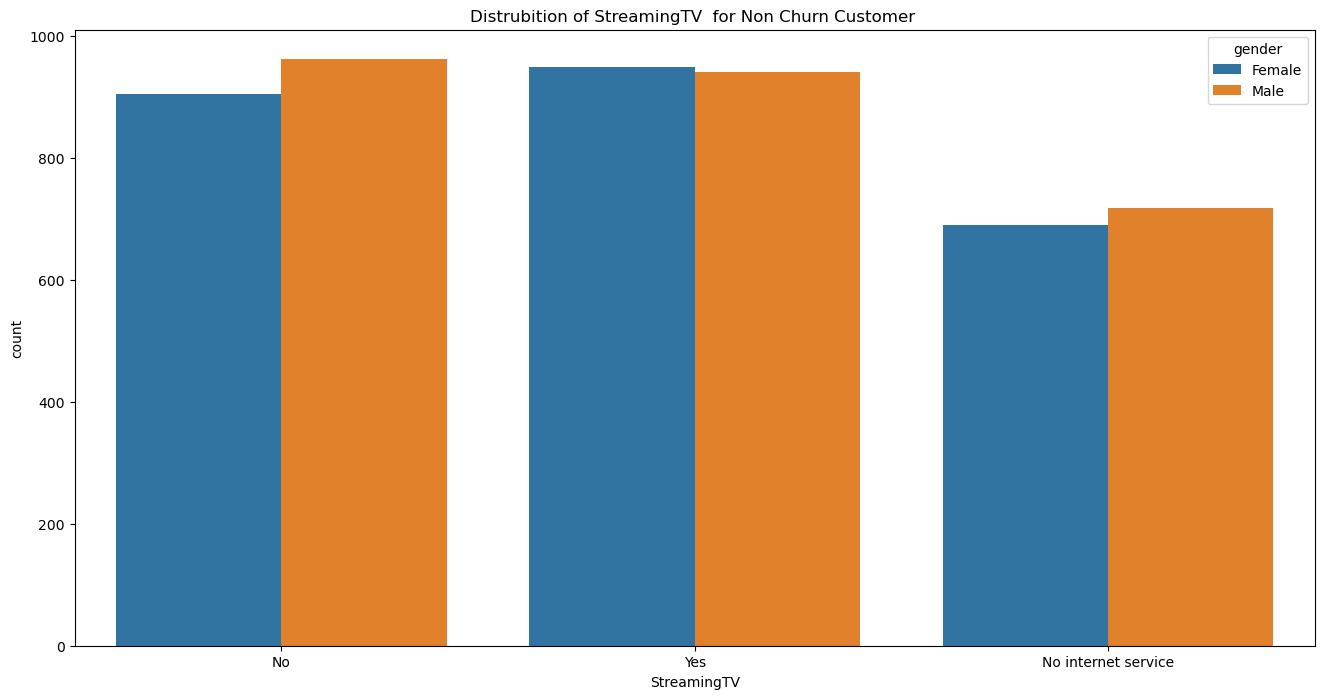

In [88]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='StreamingTV', hue = 'gender')
plt.title('Distrubition of StreamingTV  for Non Churn Customer ')
plt.show()

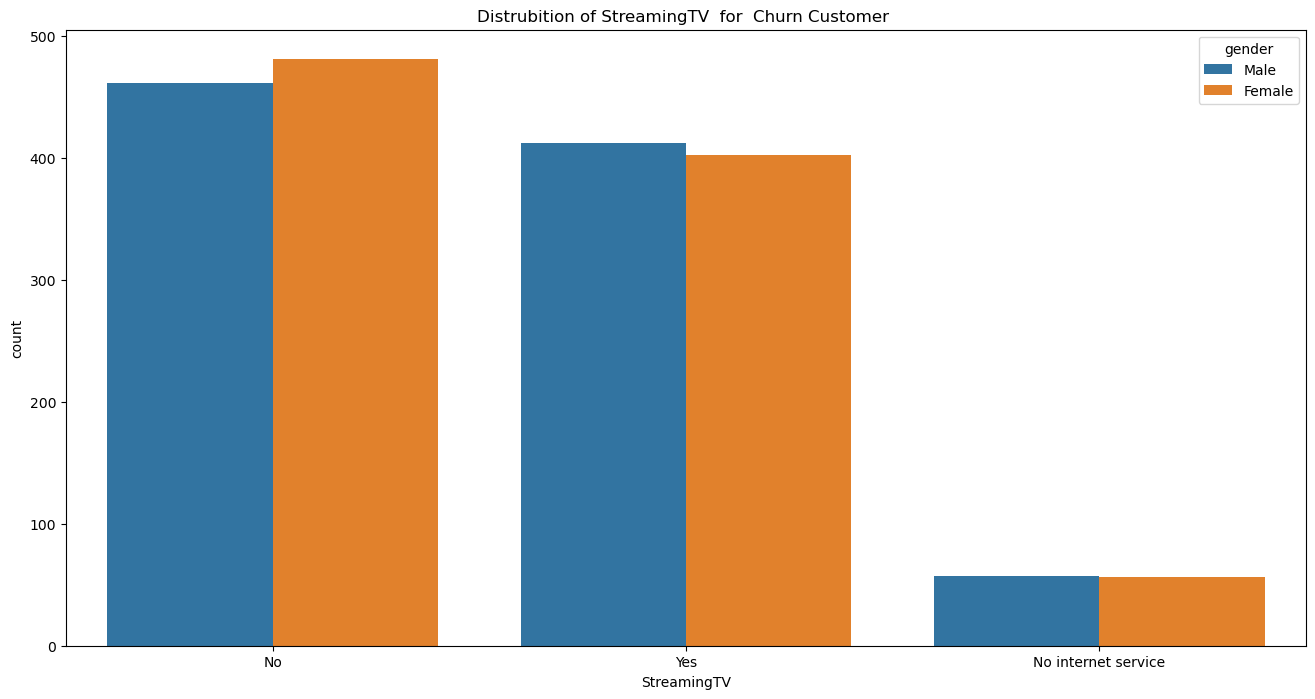

In [87]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='StreamingTV', hue = 'gender')
plt.title('Distrubition of StreamingTV  for  Churn Customer ')
plt.show()

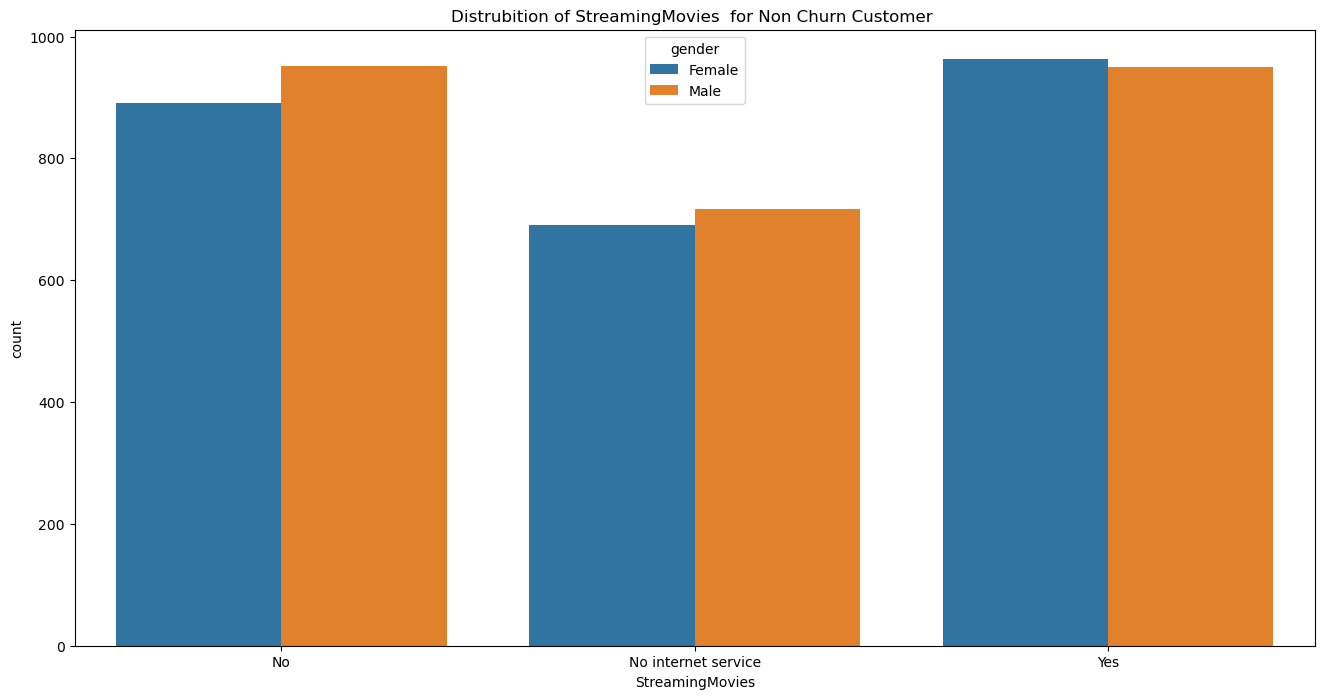

In [89]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='StreamingMovies', hue = 'gender')
plt.title('Distrubition of StreamingMovies  for Non Churn Customer ')
plt.show()

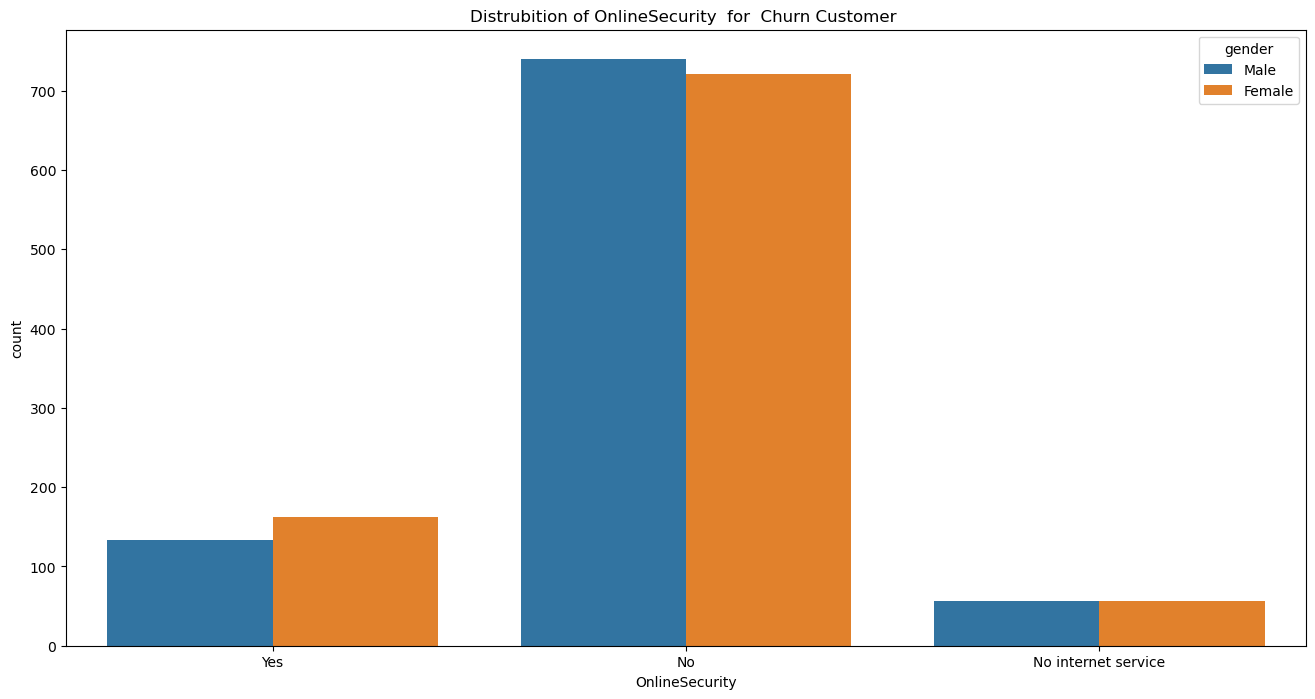

In [90]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='OnlineSecurity', hue = 'gender')
plt.title('Distrubition of OnlineSecurity  for  Churn Customer ')
plt.show()

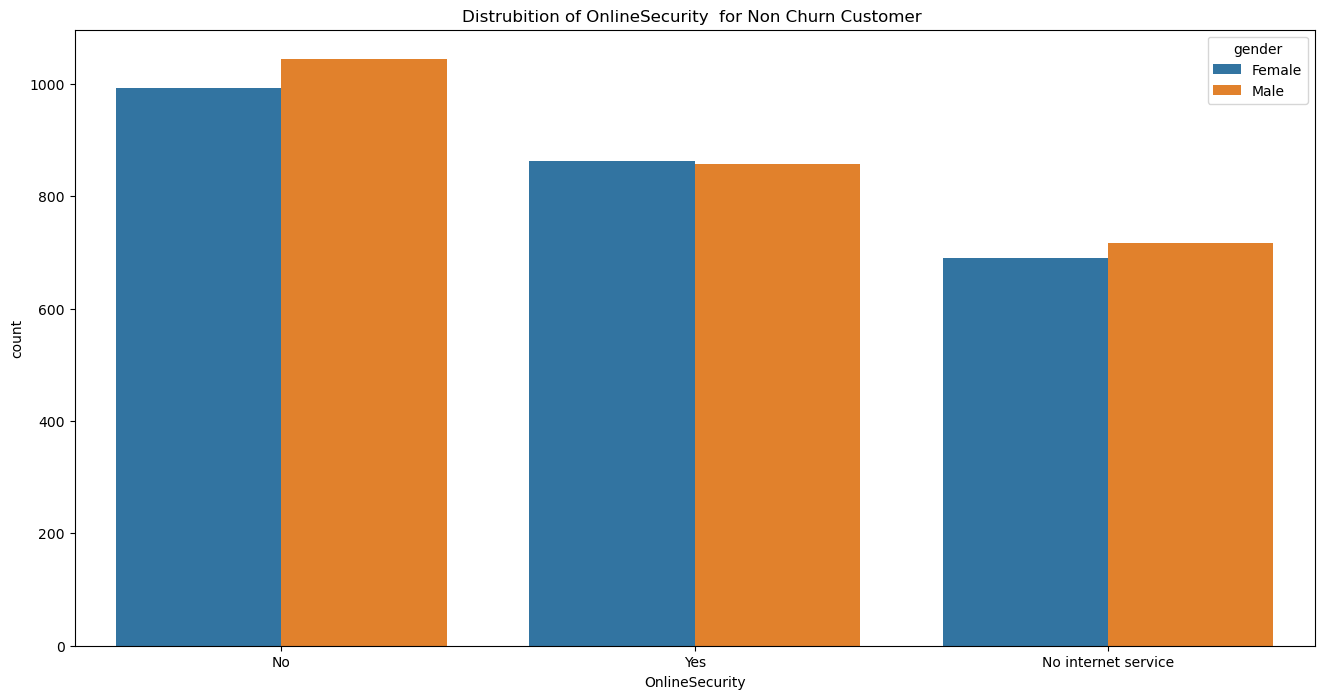

In [91]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='OnlineSecurity', hue = 'gender')
plt.title('Distrubition of OnlineSecurity  for Non Churn Customer ')
plt.show()

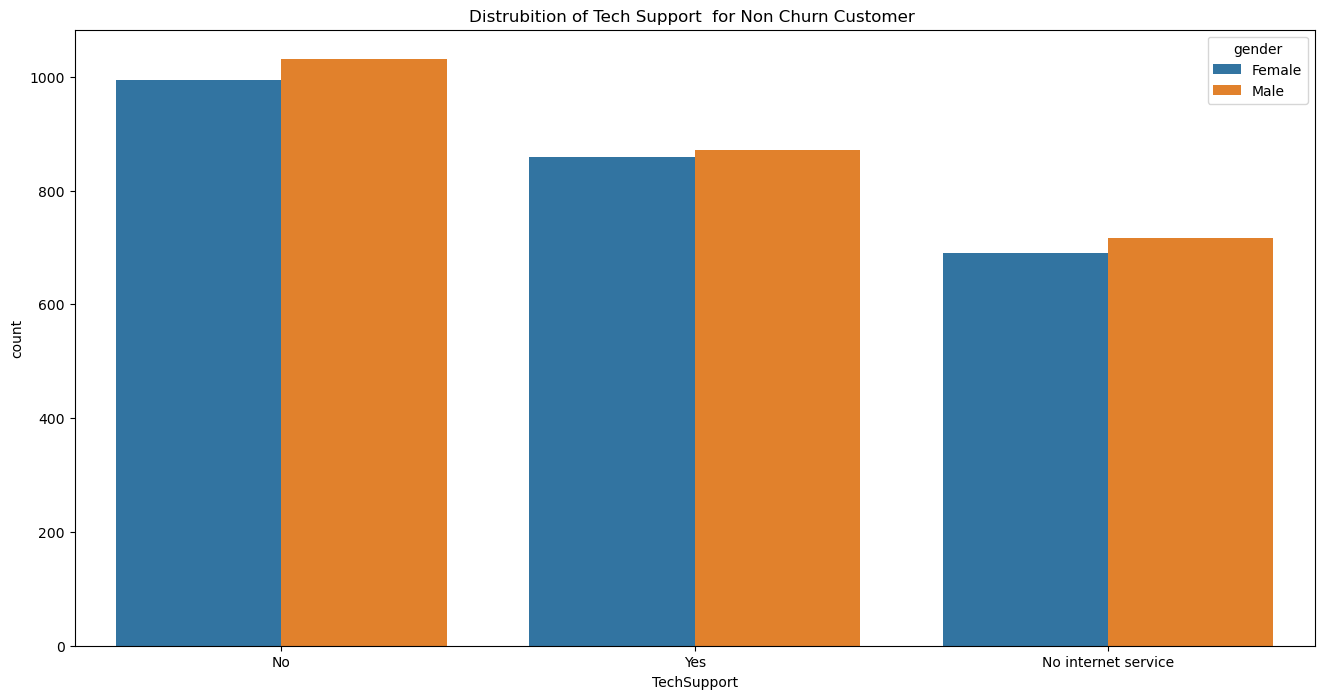

In [92]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='TechSupport', hue = 'gender')
plt.title('Distrubition of Tech Support  for Non Churn Customer ')
plt.show()

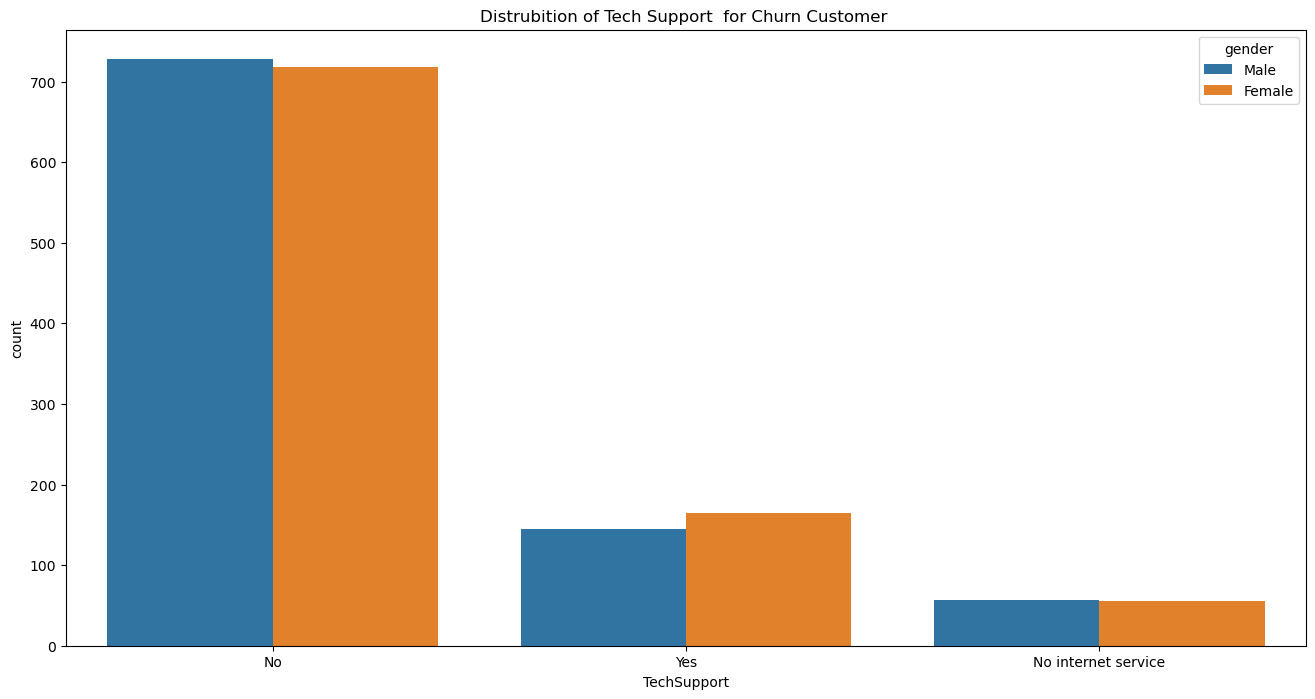

In [93]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='TechSupport', hue = 'gender')
plt.title('Distrubition of Tech Support  for Churn Customer ')
plt.show()

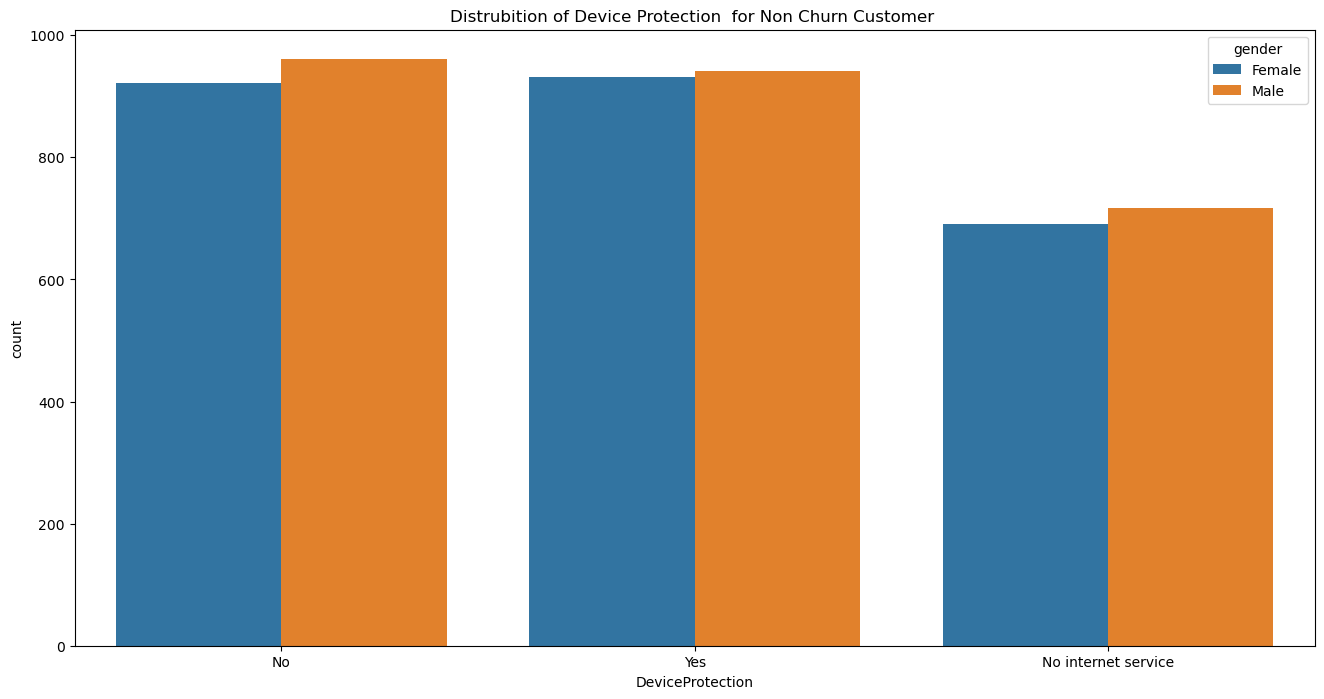

In [94]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_0,x ='DeviceProtection', hue = 'gender')
plt.title('Distrubition of Device Protection  for Non Churn Customer ')
plt.show()

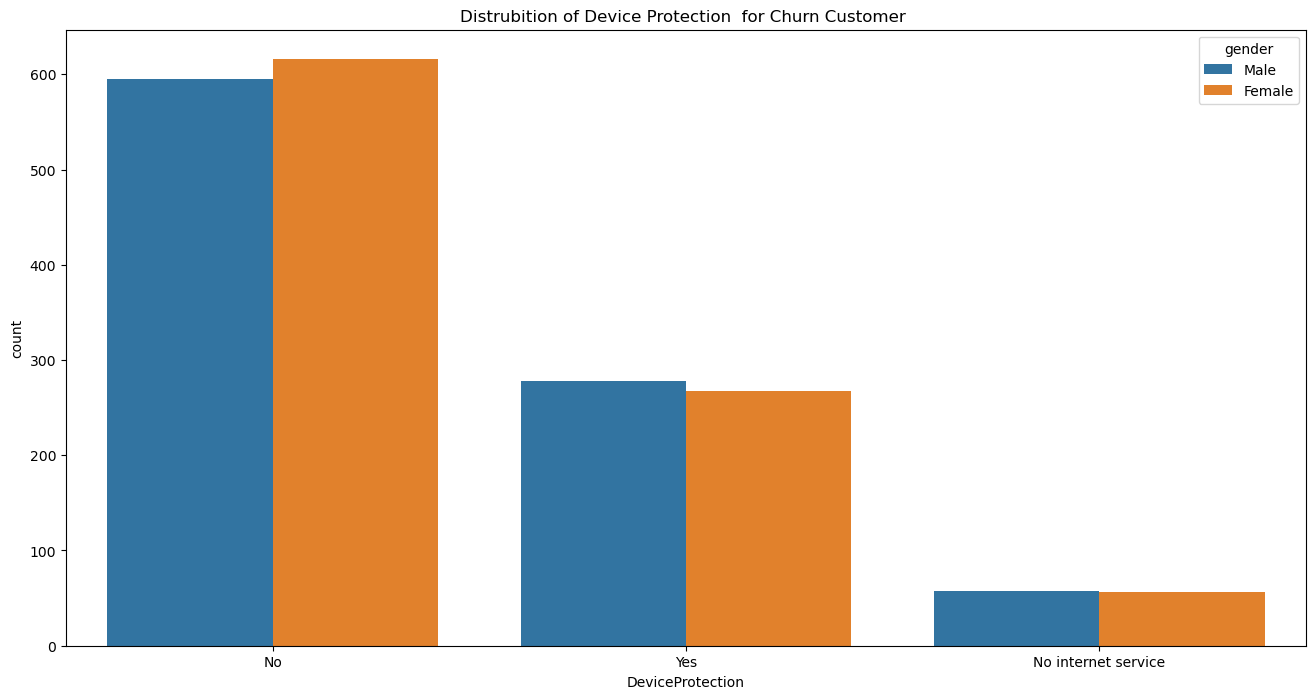

In [95]:
plt.figure(figsize = (16,8))
sns.countplot(new_df_target_1,x ='DeviceProtection', hue = 'gender')
plt.title('Distrubition of Device Protection  for Churn Customer ')
plt.show()

# CONCLUSION

Customer with no partner are more likely churn more and in that Female customer churn a bit more

Electroni check medium are highest churners

Contract Type - Month to Month are more likely to churn because of no contract as they feel free to go . While customers with 2 year contract are less likely to churn.

Customer with no Tech Support are more likely to churn 

Non Senior Citizen are more likely to churn 

Customer with Paperless Billing are more likely to churn 

Customer with Phone Service are more likely to churn

Customer with Fibre Optics are more likely to churn

Customer with no Internet Service are less likely to churn

Customer with no Online Security are more likely to churn

Customer with no Tech Support are more likely to churn

Customer with no Online Backup  are more likely to churn






In [98]:
df_dummies.to_csv('tel_churn.csv')